In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the dataset
file_path = "../data/preprocessed_genes/all_genes/brain_count_overlap_hvg_labeled.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
info = df.info()
head = df.head()

info, head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22263 entries, 0 to 22262
Columns: 102 entries, 0 to involve_cancer
dtypes: float64(100), int64(1), object(1)
memory usage: 17.3+ MB


(None,
                                          0  0.1    1    2    3    4    5    6  \
 0  GSE179572_GSM5420749_AAACAGAGCGACTCCT-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 1  GSE179572_GSM5420749_AAACATTTCCCGGATT-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2  GSE179572_GSM5420749_AAACCCGAACGAAATC-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 3  GSE179572_GSM5420749_AAACCGGAAATGTTAA-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 4  GSE179572_GSM5420749_AAACGAGACGGTTGAT-1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 
      7    8  ...   91   92   93   94   95   96   97   98   99  involve_cancer  
 0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               1  
 1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               1  
 2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               1  
 3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               1  
 4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               1  
 
 [5 rows x 

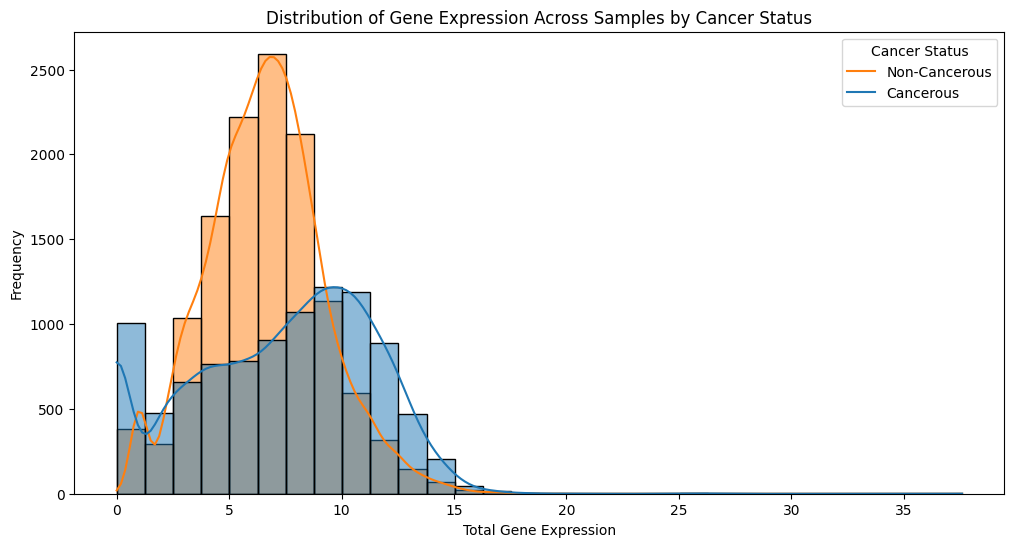

In [4]:
# Visualizing distributions of numeric columns
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df.iloc[:, 1:].sum(axis=1), bins=30, kde=True, hue='involve_cancer')
plt.title("Distribution of Gene Expression Across Samples by Cancer Status")
plt.xlabel("Total Gene Expression")
plt.ylabel("Frequency")
plt.legend(title="Cancer Status", labels=["Non-Cancerous", "Cancerous"])
plt.show()


In [5]:
from scipy.stats import ks_2samp, mannwhitneyu, ttest_ind

# Split data by cancer status
non_cancerous = df[df['involve_cancer'] == 0].iloc[:, 1:].sum(axis=1)
cancerous = df[df['involve_cancer'] == 1].iloc[:, 1:].sum(axis=1)

# KS Test
ks_stat, ks_p = ks_2samp(non_cancerous, cancerous)
print(f"KS Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4e}")

# Mann-Whitney U Test
mw_stat, mw_p = mannwhitneyu(non_cancerous, cancerous, alternative='two-sided')
print(f"Mann-Whitney U Test: Statistic = {mw_stat:.4f}, p-value = {mw_p:.4e}")

# T-Test
t_stat, t_p = ttest_ind(non_cancerous, cancerous, equal_var=False)
print(f"T-Test: Statistic = {t_stat:.4f}, p-value = {t_p:.4e}")


KS Test: Statistic = 0.2363, p-value = 2.3776e-269
Mann-Whitney U Test: Statistic = 69913354.0000, p-value = 1.5811e-79
T-Test: Statistic = 14.2098, p-value = 1.5290e-45


/tmp/ipykernel_28475/3212043943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_cancer.index[:15], y=correlation_with_cancer.values[:15], palette='viridis')


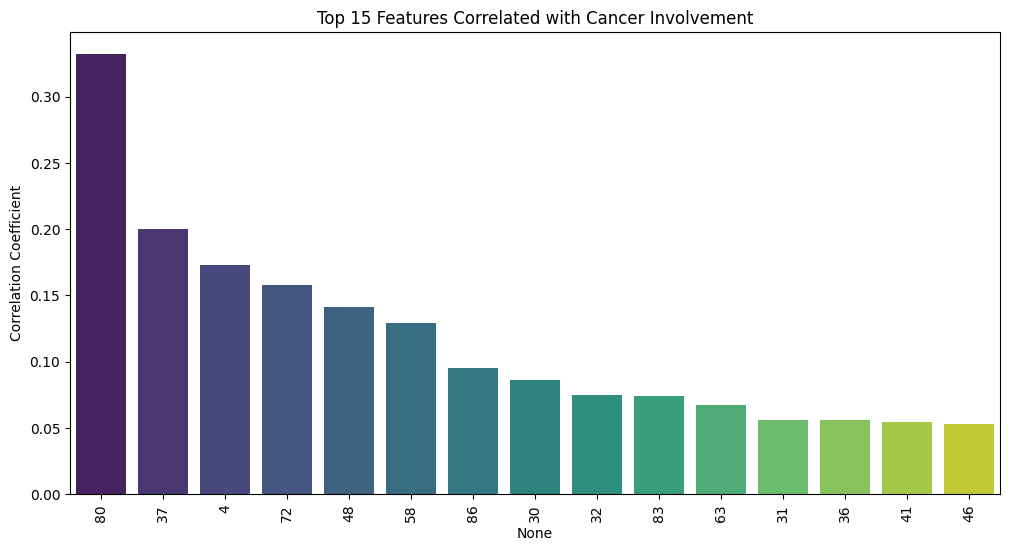

In [6]:
# Ensure only numeric columns are included
numeric_df = df.select_dtypes(include='number')

# Correlation with `involve_cancer` only
correlation_with_cancer = numeric_df.corr()['involve_cancer'].drop('involve_cancer').sort_values(ascending=False)

# Visualizing top correlated genes
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_cancer.index[:15], y=correlation_with_cancer.values[:15], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 15 Features Correlated with Cancer Involvement')
plt.ylabel('Correlation Coefficient')
plt.show()


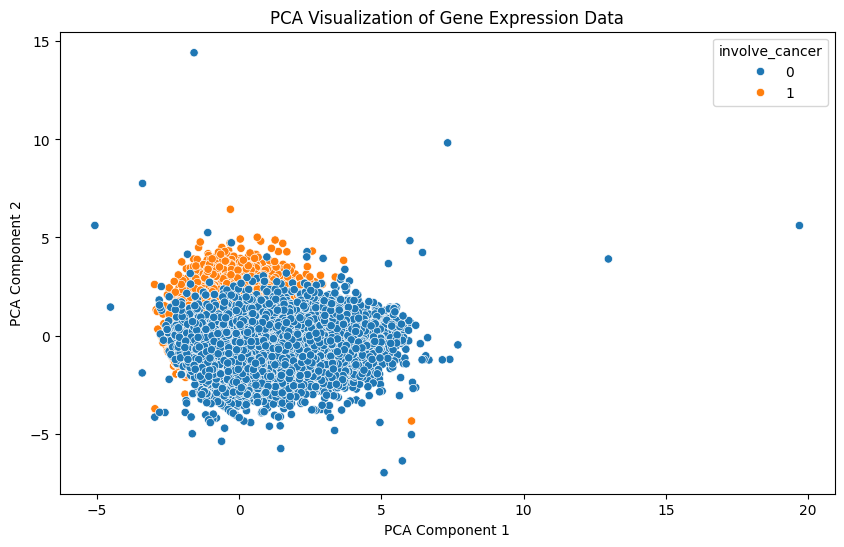

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 1:-1])  # Exclude labels

# PCA Transformation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plotting PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['involve_cancer'])
plt.title('PCA Visualization of Gene Expression Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


/home/amro/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/amro/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


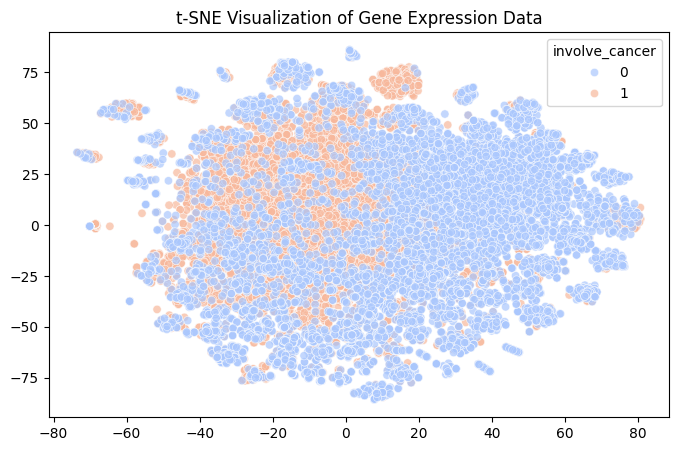

/home/amro/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


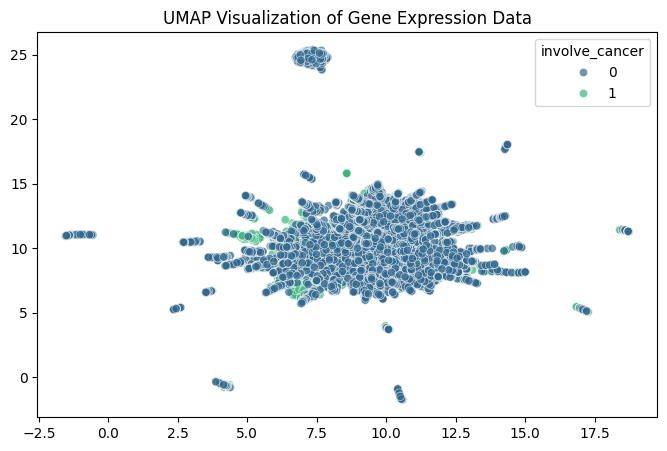

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your dataset
X = df.drop('involve_cancer', axis=1).select_dtypes(include=[np.number])
y = df['involve_cancer']

# Standardize the data for better performance
X_scaled = StandardScaler().fit_transform(X)

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('t-SNE Visualization of Gene Expression Data')
plt.show()

# UMAP visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('UMAP Visualization of Gene Expression Data')
plt.show()

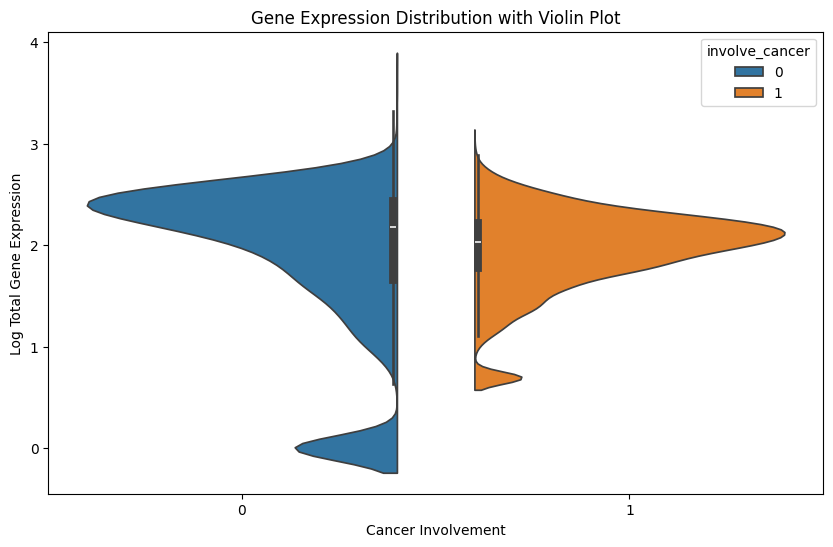

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='involve_cancer', 
                y=np.log1p(df.iloc[:, 1:].sum(axis=1)), 
                data=df, 
                hue='involve_cancer', 
                split=True)
plt.title("Gene Expression Distribution with Violin Plot")
plt.xlabel("Cancer Involvement")
plt.ylabel("Log Total Gene Expression")
plt.show()


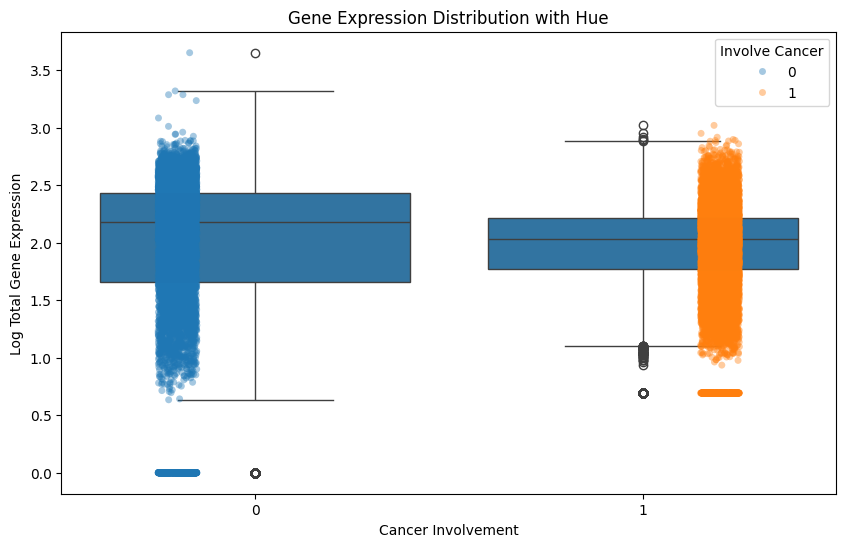

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='involve_cancer', 
            y=np.log1p(df.iloc[:, 1:].sum(axis=1)), 
            data=df)

sns.stripplot(x='involve_cancer', 
              y=np.log1p(df.iloc[:, 1:].sum(axis=1)), 
              data=df, 
              hue='involve_cancer', 
              dodge=True, 
              alpha=0.4, 
              jitter=True)

plt.title("Gene Expression Distribution with Hue")
plt.xlabel("Cancer Involvement")
plt.ylabel("Log Total Gene Expression")
plt.legend(title='Involve Cancer')
plt.show()


In [15]:
stats = df.describe().transpose()
stats['skew'] = df.select_dtypes(include=[np.number]).skew()
stats['kurtosis'] = df.select_dtypes(include=[np.number]).kurtosis()
print(stats)


                  count      mean       std  min  25%  50%  75%       max  \
0.1             22263.0  0.019800  0.133255  0.0  0.0  0.0  0.0  6.448256   
1               22263.0  0.001422  0.041911  0.0  0.0  0.0  0.0  4.750608   
2               22263.0  0.130836  0.286160  0.0  0.0  0.0  0.0  6.448256   
3               22263.0  0.003978  0.064569  0.0  0.0  0.0  0.0  4.885639   
4               22263.0  0.137208  0.310778  0.0  0.0  0.0  0.0  6.448256   
...                 ...       ...       ...  ...  ...  ...  ...       ...   
96              22263.0  0.072508  0.221725  0.0  0.0  0.0  0.0  6.112417   
97              22263.0  0.024436  0.134386  0.0  0.0  0.0  0.0  5.575002   
98              22263.0  0.045680  0.179874  0.0  0.0  0.0  0.0  6.671083   
99              22263.0  0.037156  0.169260  0.0  0.0  0.0  0.0  6.448256   
involve_cancer  22263.0  0.564165  0.495877  0.0  0.0  1.0  1.0  1.000000   

                     skew     kurtosis  
0.1             13.182808   345.63